Target
- The following experiment was conducted at an early stage with default learning rate.
- The purpose is to collect dataset  with the queue number with number 500 and test the affect the stability



Scripts

In [ ]:
# # script
# python dialogue_system/main.py --device 3 --training_data_type 1 --trainingdata_org_type 0 --prefix_type 3 --api_selection 2 --query_number 500; 
# python dialogue_system/main.py --device 3 --training_data_type 1 --trainingdata_org_type 1 --prefix_type 3 --api_selection 2 --query_number 500; 
# python dialogue_system/main.py --device 3 --training_data_type 1 --trainingdata_org_type 2 --prefix_type 3 --api_selection 2 --query_number 500; 
# python dialogue_system/main.py --device 3 --training_data_type 1 --trainingdata_org_type 3 --prefix_type 3 --api_selection 2 --query_number 500; 

# python dialogue_system/main.py --device 4 --training_data_type 1 --trainingdata_org_type 4 --prefix_type 3 --api_selection 1 --query_number 500; 
# python dialogue_system/main.py --device 4 --training_data_type 0 --trainingdata_org_type 0 --prefix_type 3 --api_selection 1 --query_number 500;
# python dialogue_system/main.py --device 4 --training_data_type 0 --trainingdata_org_type 1 --prefix_type 3 --api_selection 1 --query_number 500;
# python dialogue_system/main.py --device 4 --training_data_type 0 --trainingdata_org_type 2 --prefix_type 3 --api_selection 1 --query_number 500;



Data Collection

In [1]:
# First extract data

In [1]:
import os 
keyword=[
    'training dataset type',
    'training data orgnization',
    'average loss',
    'tool model loading compeleted',
    'perplexity',
    'prefix_type is =====',
    'number1',
    'number2',
    'number3'
]
path_dir='/home/chenboc1/localscratch2/chenboc1/Adver_Conv/log/demo_job'



In [2]:
result_record=[]
for item in os.listdir(path_dir):
    log_file= os.path.join(path_dir,item,'log')
    find_patch=[]
    with open(log_file) as f:
        content=f.readlines()
        try:
            lst= [[i.split('=')[0],i.split('=')[1]] for i in content[0].split(', ')]
        except:
            continue
        flag=0
        for item in lst:
            if 'query_number' == item[0]:
                if item[1]=='500':    
                    flag=1
        if flag:
            for item in lst:
                if 'query_number' == item[0]:    
                    if item[1]=='500':
                        print(log_file)
                        # find_patch.append(str(item[1].replace("'",'')))            
                if 'training_data_type' == item[0]:    
                    print(item)
                    find_patch.append(str(item[1].replace("'",'')))

                if 'trainingdata_org_type' == item[0]:    
                    print(item)
                    find_patch.append(str(item[1].replace("'",'')))

            for line in content:
                for key in keyword:
                    if key in line:
                        find_patch.append(line)
            result_record.append(find_patch)
        else:
            # print('nothing')
            pass
for item in os.listdir(path_dir):
    log_file= os.path.join(path_dir,item,'log')
    find_patch=[]
    with open(log_file) as f:
        content=f.readlines()
        try:
            lst= [[i.split('=')[0],i.split('=')[1]] for i in content[1].split(', ')]
        except:
            continue
        flag=0
        for item in lst:
            if 'query_number' == item[0]:
                if item[1]=='500':    
                    flag=1
        if flag:
            for item in lst:
                if 'query_number' == item[0]:    
                    if item[1]=='500':
                        print(log_file)
                        # find_patch.append(str(item[1].replace("'",'')))            
                if 'training_data_type' == item[0]:    
                    print(item)
                    find_patch.append(str(item[1].replace("'",'')))

                if 'trainingdata_org_type' == item[0]:    
                    print(item)
                    find_patch.append(str(item[1].replace("'",'')))

            for line in content:
                for key in keyword:
                    if key in line:
                        find_patch.append(line)
            result_record.append(find_patch)
        else:
            # print('nothing')
            pass        

/home/chenboc1/localscratch2/chenboc1/Adver_Conv/log/demo_job/1111_181406/log
['training_data_type', "'0'"]
['trainingdata_org_type', "'2'"]
/home/chenboc1/localscratch2/chenboc1/Adver_Conv/log/demo_job/1127_115132/log
['training_data_type', "'1'"]
['trainingdata_org_type', "'2'"]
/home/chenboc1/localscratch2/chenboc1/Adver_Conv/log/demo_job/1111_124040/log
['training_data_type', "'1'"]
['trainingdata_org_type', "'4'"]
/home/chenboc1/localscratch2/chenboc1/Adver_Conv/log/demo_job/1111_123845/log
['training_data_type', "'1'"]
['trainingdata_org_type', "'0'"]
/home/chenboc1/localscratch2/chenboc1/Adver_Conv/log/demo_job/1111_162610/log
['training_data_type', "'0'"]
['trainingdata_org_type', "'1'"]
/home/chenboc1/localscratch2/chenboc1/Adver_Conv/log/demo_job/1127_095636/log
['training_data_type', "'1'"]
['trainingdata_org_type', "'1'"]
/home/chenboc1/localscratch2/chenboc1/Adver_Conv/log/demo_job/1111_143458/log
['training_data_type', "'0'"]
['trainingdata_org_type', "'0'"]
/home/chenboc

In [3]:
import numpy
all_info=[]
for record in result_record:
    info=[numpy.nan for i in keyword]
    info[0]=str(record[0])
    info[1]=str(record[1])
    for sentence in record:

        if keyword[2] in sentence:
            info[2]=sentence.split('average loss =')[1].replace('\n','')
            continue
        if keyword[3] in sentence:
            info[3]=sentence.split('demo_job/')[1].replace('\n','')        
            continue
        if keyword[4] in sentence:
            info[4]=sentence.split('tensor(')[1].replace(')\n','')
            continue
        if keyword[5] in sentence:
            info[5]=sentence.split('prefix_type is ===== ')[1].replace('\n','')
            continue
        if keyword[6] in sentence:
            info[6]=sentence.split('is')[1].replace('\n','')
            continue
        if keyword[7] in sentence:
            info[7]=sentence.split('is')[1].replace('\n','')
            continue                                                
        if keyword[8] in sentence:
            info[8]=sentence.split('is')[1].replace('\n','')
            continue
    all_info.append(info)

In [4]:
import pandas as pd

df = pd.DataFrame(all_info)
df.columns = keyword
new_df=df[(df['number1']!='0')&(df['number3']!='0.0')].dropna(subset=['tool model loading compeleted','number1'])

new_df=new_df.sort_values(by=['training dataset type','training data orgnization','prefix_type is ====='])
new_df

,training dataset type,training data orgnization,average loss,tool model loading compeleted,perplexity,prefix_type is =====,number1,number2,number3
6,0,0,3.9537966471342814,1111_143458,38.6108,3,23,0.046,0.8260869565217391
4,0,1,3.978857641418775,1111_162610,41.5288,3,76,0.152,0.42105263157894735
0,0,2,3.9761057794094086,1111_181406,42.7315,3,74,0.148,0.22972972972972974
10,1,0,3.552469838636391,1128_224831,33.7471,3,28,0.056,0.6071428571428571
5,1,1,3.511070117548833,1127_095636,31.4489,3,223,0.446,0.34080717488789236
1,1,2,3.5127485615078666,1127_115132,30.9717,3,240,0.48,0.25416666666666665
9,1,3,3.5506094390104392,1127_153818,32.4199,3,52,0.104,0.5384615384615384
11,1,3,3.556066150360543,1128_195914,31.5032,3,59,0.118,0.711864406779661
2,1,4,3.5202955042198742,1111_124040,31.6849,3,238,0.476,0.25630252100840334


- Then put the data into the csv file and download as the Adv_conv result - Sheet3.csv

In [5]:
# Modify the sheet 4
import json
import os
def true_value(logscore_file):

    with open(logscore_file, 'r') as f:
        data = json.load(f)
    num=0
    total=0
    for item in data:
        for i in item[1::2]:
            if i>0.5:
                # print(item)
                if item[item.index(i)-1]<0.5:
                    num+=1
                total+=1
                # break
                break
    print(total,total/len(data),num/total)    
def wrong_value(logscore_file):

    with open(logscore_file, 'r') as f:
        data = json.load(f)       
    num=0
    total=0
    for item in data:
        for i in item[1::2]:
            if i>0.5:
                # print(item)
                if item[item.index(i)-1]<0.5:
                    num+=1
                total+=1
                # break
                continue            
    print(total,total/len(data),num/total)       
file_path='/home/chenboc1/localscratch2/chenboc1/Adver_Conv/result/eval/demo_job/' 
# new_df=df[(df['number1']!='0')].dropna(subset=['tool model loading compeleted'])
len(list(new_df['tool model loading compeleted']))
for file_name in list(new_df['tool model loading compeleted']):
    fil=os.path.join(file_path,file_name,'eval_dialogue.json')
    true_value(fil)
print()
for file_name in list(new_df['tool model loading compeleted']):
    fil=os.path.join(file_path,file_name,'eval_dialogue.json')
    wrong_value(fil)

20 0.04 0.85
64 0.128 0.4375
62 0.124 0.22580645161290322
26 0.052 0.6153846153846154
180 0.36 0.2777777777777778
188 0.376 0.2393617021276596
44 0.088 0.5
52 0.104 0.7115384615384616
182 0.364 0.25274725274725274

23 0.046 0.8260869565217391
76 0.152 0.42105263157894735
74 0.148 0.22972972972972974
28 0.056 0.6071428571428571
223 0.446 0.34080717488789236
240 0.48 0.25416666666666665
52 0.104 0.5384615384615384
59 0.118 0.711864406779661
238 0.476 0.25630252100840334


Figure Code


In [6]:
import pandas as pd
df = pd.read_csv ('/home/chenboc1/localscratch2/chenboc1/Adver_Conv/data/Adv_conv result - Sheet3.csv')
df


,training dataset type,training data orgnization,average loss,tool model loading compeleted,perplexity,prefix_type is =====,number1,number2,number3,querynumber,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Comparasion between the query number with
0,0.0,0.0,3.953797,1111_143458,38.6108,3.0,20.00,0.040,0.850000,500.0,23.0,0.046,0.826087,NaN,NaN,NaN,NaN
1,0.0,1.0,3.978858,1111_162610,41.5288,3.0,64.00,0.128,0.437500,500.0,76.0,0.152,0.421053,NaN,NaN,NaN,Result from query =500
2,0.0,2.0,3.976106,1111_181406,42.7315,3.0,62.00,0.124,0.225806,500.0,74.0,0.148,0.229730,NaN,NaN,NaN,file_name: Fig_seq_number.ipynb
3,1.0,0.0,3.552470,1128_224831,33.7471,3.0,26.00,0.052,0.615385,500.0,28.0,0.056,0.607143,NaN,NaN,NaN,NaN
4,1.0,1.0,3.511070,1127_095636,31.4489,3.0,180.00,0.360,0.277778,500.0,223.0,0.446,0.340807,NaN,NaN,NaN,NaN
5,1.0,2.0,3.512749,1127_115132,30.9717,3.0,188.00,0.376,0.239362,500.0,240.0,0.480,0.254167,NaN,NaN,NaN,NaN
6,1.0,3.0,3.556066,1128_195914,31.5032,3.0,52.00,0.104,0.711538,500.0,59.0,0.118,0.711864,NaN,NaN,NaN,NaN
7,1.0,4.0,3.520296,1111_124040,31.6849,3.0,182.00,0.364,0.252747,500.0,238.0,0.476,0.256303,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df = pd.read_csv ('/home/chenboc1/localscratch2/chenboc1/Adver_Conv/data/Adv_conv result - Sheet3.csv')
df=df[(df['training dataset type']==1)]
newdf=df.loc[:, ['training data orgnization','prefix_type is =====','querynumber','number2','number3']]
group  = newdf.groupby('querynumber',sort=False)
all_data_list_e=[]
all_data_list=[]
data,label=[],[]
for key, d in group:
    key=d['training data orgnization']
    all_data_list.append(d['number2']) 
    all_data_list_e.append([i*list(d['number2'])[ind] for ind,i in enumerate(list(d['number3']))])


In [8]:
len(all_data_list)

2

In [9]:
import os,json,numpy
import matplotlib
import matplotlib as plt
import matplotlib.pyplot as plt
font = {'family': 'arial',
        'size': 24}
matplotlib.rcParams['mathtext.rm'] = 'arial'
figure_path='/home/chenboc1/localscratch2/chenboc1/Adver_Conv/result/result_figure/figures'
matplotlib.rc('font', **font)

<Figure size 432x432 with 0 Axes>

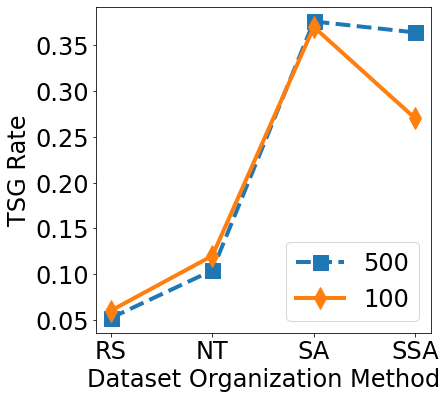

<Figure size 432x432 with 0 Axes>

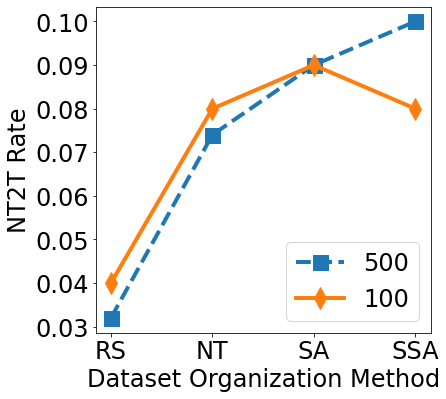

In [26]:

'''
training data orgnization	
0	random
1	input/output NT---T(random default)
#2	input/output NT---T(stronger)
3	input=NT(sort) output=NT(sort) benign dataset NT--NT(stronger)
#4	input=NT(sort) output=T(sort)


prefix_type is =====		
1	trigger_sentence.json	
2	data/binary_benign_sentence.json	
3	data/realtoxicprompt.json	
4	data/reddit_comment_setence.json	

'''
'''
================================
@1
================================
'''
new_x_label=[
        'MR',
        'MD',
        # 'MS1',
        'MS2',
        'MS3',
]
new_x_label=['RS', 'NT', 'SA', 'SSA']
x=range(len(list(key[:4])))
reshape_index=[0,3,2,4,1]
plt.figure(figsize=(6, 6))
plt.figure().set_size_inches(6,6)
plt.xlabel('Dataset Organization Method',fontdict=font)  # x轴标题
plt.ylabel('TSG Rate',fontdict=font)  # y轴标题

plt.plot(x, numpy.array(all_data_list[0])[reshape_index][:4], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, numpy.array(all_data_list[1])[reshape_index][:4], 
         linestyle = 'solid',
         linewidth = 4,
         marker = 'd',
         markersize = 15,
        #  color = 'darkorange',
) 

plt.xticks(x,new_x_label,size = 24)
plt.yticks(size = 24)
# plt.grid(linestyle="-")
 
plt.legend(['500','100'],fontsize=30,prop={'size':24},loc=4)

plt.savefig(os.path.join(figure_path,'Fig5_a.pdf'), dpi=300,bbox_inches='tight',  pad_inches = 0)
plt.show()

'''
================================
@2
================================
'''
reshape_index=[0,3,2,1,4]
plt.figure(figsize=(6, 6))
plt.figure().set_size_inches(6,6)
plt.xlabel('Dataset Organization Method',fontdict=font)  # x轴标题
plt.ylabel('NT2T Rate',fontdict=font)  # y轴标题
plt.plot(x, numpy.array(all_data_list_e[0])[reshape_index][:4], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, numpy.array(all_data_list_e[1])[reshape_index][:4], 
         linestyle = 'solid',
         linewidth = 4,
         marker = 'd',
         markersize = 15,
        #  color = 'darkorange',
) 

plt.xticks(x,new_x_label,size = 24)
plt.yticks(size = 24)
# plt.grid(linestyle="-")
     
plt.legend(['500','100'],fontsize=30,prop={'size':24},loc=4)

plt.savefig(os.path.join(figure_path,'Fig5_b.pdf'), dpi=300,bbox_inches='tight',  pad_inches = 0)
plt.show()


Dataset 2

In [11]:
df = pd.read_csv ('/home/chenboc1/localscratch2/chenboc1/Adver_Conv/data/Adv_conv result - Sheet3.csv')
df=df[(df['training dataset type']==0)]
newdf=df.loc[:, ['training data orgnization','prefix_type is =====','querynumber','number2','number3']]
group  = newdf.groupby('querynumber',sort=False)
all_data_list_e=[]
all_data_list=[]
data,label=[],[]
for key, d in group:
    key=d['training data orgnization']
    all_data_list.append(d['number2']) 
    all_data_list_e.append([i*list(d['number2'])[ind] for ind,i in enumerate(list(d['number3']))])


In [12]:
len(all_data_list_e)

2

<Figure size 432x432 with 0 Axes>

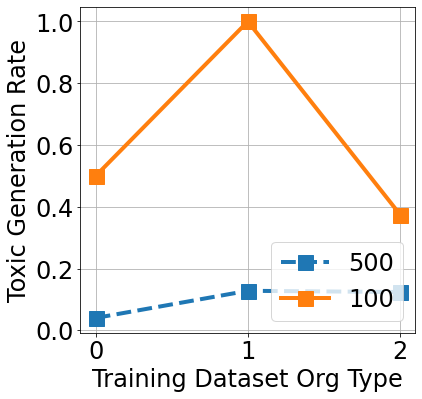

<Figure size 432x432 with 0 Axes>

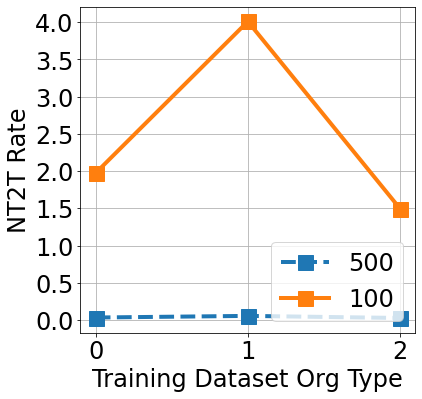

In [13]:

'''
training data orgnization	
0	random
1	input/output NT---T(random default)
#2	input/output NT---T(stronger)
3	input=NT(sort) output=NT(sort) benign dataset NT--NT(stronger)
#4	input=NT(sort) output=T(sort)


prefix_type is =====		
1	trigger_sentence.json	
2	data/binary_benign_sentence.json	
3	data/realtoxicprompt.json	
4	data/reddit_comment_setence.json	

'''
'''
================================
@1
================================
'''
x=range(len(list(key)))

plt.figure(figsize=(6, 6))
plt.figure().set_size_inches(6,6)
plt.xlabel('Training Dataset Org Type',fontdict=font)  # x轴标题
plt.ylabel('Toxic Generation Rate',fontdict=font)  # y轴标题
plt.plot(x, all_data_list[0], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, all_data_list[1], 
         linestyle = 'solid',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 

plt.xticks(x,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")

plt.legend(['500','100'],fontsize=30,prop={'size':24},loc=4)

plt.savefig(os.path.join(figure_path,'Fig5_c.pdf'), dpi=300,bbox_inches='tight',  pad_inches = 0)
plt.show()

'''
================================
@2
================================
'''
plt.figure(figsize=(6, 6))
plt.figure().set_size_inches(6,6)
plt.xlabel('Training Dataset Org Type',fontdict=font)  # x轴标题
plt.ylabel('NT2T Rate',fontdict=font)  # y轴标题
plt.plot(x, all_data_list_e[0], 
         linestyle = '--',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.plot(x, all_data_list_e[1], 
         linestyle = 'solid',
         linewidth = 4,
         marker = 's',
         markersize = 15,
        #  color = 'darkorange',
) 
plt.xticks(x,size = 24)
plt.yticks(size = 24)
plt.grid(linestyle="-")
     

plt.legend(['500','100'],fontsize=30,prop={'size':24},loc=4)


plt.savefig(os.path.join(figure_path,'Fig5_d.pdf'), dpi=300,bbox_inches='tight',  pad_inches = 0)
plt.show()
